# Experiment 1 - Notas do Enem 2021

In [1]:
import pandas as pd

datapaths = {   "2015": "./datasets/extracted/DADOS/MICRODADOS_ENEM_2015.csv",
                "2016": "./datasets/extracted/DADOS/microdados_enem_2016.csv",
                "2017": "./datasets/extracted/DADOS/MICRODADOS_ENEM_2017.csv",
                "2018": "./datasets/extracted/DADOS/MICRODADOS_ENEM_2018.csv",
                "2019": "./datasets/extracted/DADOS/MICRODADOS_ENEM_2019.csv",
                "2020": "./datasets/extracted/DADOS/MICRODADOS_ENEM_2020.csv",
                "2021": "./datasets/extracted/DADOS/MICRODADOS_ENEM_2021.csv"}

# Load the 2021 dataset
microdados_2021 = pd.read_csv(datapaths["2021"], encoding="ISO-8859-1", delimiter=";")

# Select columns we are interested in analysing
columns_of_interest = [
    "NU_INSCRICAO", # Numero de Inscricao
    "TP_PRESENCA_CN", # "Presença na prova objetiva de Ciências da Natureza"
    "TP_PRESENCA_CH", # "Presença na prova objetiva de Ciências Humanas"
    "TP_PRESENCA_LC", # "Presença na prova objetiva de Linguagens e Códigos"
    "TP_PRESENCA_MT", # "Presença na prova objetiva de Matemática"
    "CO_PROVA_CN", # "Código do tipo de prova de Ciências da Natureza"
    "CO_PROVA_CH", # "Código do tipo de prova de Ciências Humanas"
    "CO_PROVA_LC", # "Código do tipo de prova de Linguagens e Códigos"
    "CO_PROVA_MT", # "Código do tipo de prova de Matemática"
    "NU_NOTA_CN", # "Nota da prova de Ciências da Natureza"
    "NU_NOTA_CH", # "Nota da prova de Ciências Humanas"
    "NU_NOTA_LC", # "Nota da prova de Linguagens e Códigos"
    "NU_NOTA_MT", # "Nota da prova de Matemática"
    "TP_STATUS_REDACAO", # "Situação da redação do participante"
    "NU_NOTA_REDACAO" # "Nota da prova de redação"
]

data = microdados_2021[columns_of_interest]

data.head()

,NU_INSCRICAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,210053865474,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,1.0,760.0
1,210052384164,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,1.0,560.0
2,210052589243,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,210052128335,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,1.0,780.0
4,210051353021,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,1.0,780.0


## Data Process

In [2]:
# Let's remove everyone who didn't do each test

data = data.drop(data[data.TP_PRESENCA_CN != 1].index)
data = data.drop(data[data.TP_PRESENCA_CH != 1].index)
data = data.drop(data[data.TP_PRESENCA_LC != 1].index)
data = data.drop(data[data.TP_PRESENCA_MT != 1].index)
data = data.drop(data[data.TP_STATUS_REDACAO != 1].index)

In [3]:
# Gather notes based on exam color

prova_cn_azul = data.drop(data[data.CO_PROVA_CN != 909].index).NU_NOTA_CN
prova_cn_amarela = data.drop(data[data.CO_PROVA_CN != 910].index).NU_NOTA_CN
prova_cn_cinza = data.drop(data[data.CO_PROVA_CN != 911].index).NU_NOTA_CN
prova_cn_rosa = data.drop(data[data.CO_PROVA_CN != 912].index).NU_NOTA_CN

prova_ch_azul = data.drop(data[data.CO_PROVA_CH != 879].index).NU_NOTA_CH
prova_ch_amarela = data.drop(data[data.CO_PROVA_CH != 880].index).NU_NOTA_CH
prova_ch_branca = data.drop(data[data.CO_PROVA_CH != 881].index).NU_NOTA_CH
prova_ch_rosa = data.drop(data[data.CO_PROVA_CH != 882].index).NU_NOTA_CH

prova_lc_azul = data.drop(data[data.CO_PROVA_LC != 889].index).NU_NOTA_LC
prova_lc_amarela = data.drop(data[data.CO_PROVA_LC != 890].index).NU_NOTA_LC
prova_lc_rosa = data.drop(data[data.CO_PROVA_LC != 891].index).NU_NOTA_LC
prova_lc_branca = data.drop(data[data.CO_PROVA_LC != 892].index).NU_NOTA_LC

prova_mt_azul = data.drop(data[data.CO_PROVA_MT != 899].index).NU_NOTA_MT
prova_mt_amarela = data.drop(data[data.CO_PROVA_MT != 900].index).NU_NOTA_MT
prova_mt_rosa = data.drop(data[data.CO_PROVA_MT != 901].index).NU_NOTA_MT
prova_mt_cinza = data.drop(data[data.CO_PROVA_MT != 902].index).NU_NOTA_MT

assert(len(prova_cn_azul) != 0)
assert(len(prova_cn_amarela) != 0)
assert(len(prova_cn_cinza) != 0)
assert(len(prova_cn_rosa) != 0)
assert(len(prova_ch_azul) != 0)
assert(len(prova_ch_amarela) != 0)
assert(len(prova_ch_branca) != 0)
assert(len(prova_ch_rosa) != 0)
assert(len(prova_lc_azul) != 0)
assert(len(prova_lc_amarela) != 0)
assert(len(prova_lc_rosa) != 0)
assert(len(prova_lc_branca) != 0)
assert(len(prova_mt_azul) != 0)
assert(len(prova_mt_amarela) != 0)
assert(len(prova_mt_rosa) != 0)
assert(len(prova_mt_cinza) != 0)

prova_cn = pd.concat(
    [prova_cn_azul.rename("Azul").reset_index(drop=True),
     prova_cn_amarela.rename("Amarela").reset_index(drop=True),
     prova_cn_cinza.rename("Cinza").reset_index(drop=True),
     prova_cn_rosa.rename("Rosa").reset_index(drop=True)], axis = 1)

assert(len(prova_cn["Azul"].dropna()) == len(prova_cn_azul))
assert(len(prova_cn["Amarela"].dropna()) == len(prova_cn_amarela))
assert(len(prova_cn["Cinza"].dropna()) == len(prova_cn_cinza))
assert(len(prova_cn["Rosa"].dropna()) == len(prova_cn_rosa))

prova_ch = pd.concat(
    [prova_ch_azul.rename("Azul").reset_index(drop=True),
     prova_ch_amarela.rename("Amarela").reset_index(drop=True),
     prova_ch_branca.rename("Branca").reset_index(drop=True),
     prova_ch_rosa.rename("Rosa").reset_index(drop=True)], axis = 1)

assert(len(prova_ch["Azul"].dropna()) == len(prova_ch_azul))
assert(len(prova_ch["Amarela"].dropna()) == len(prova_ch_amarela))
assert(len(prova_ch["Branca"].dropna()) == len(prova_ch_branca))
assert(len(prova_ch["Rosa"].dropna()) == len(prova_ch_rosa))

prova_lc = pd.concat(
    [prova_lc_azul.rename("Azul").reset_index(drop=True),
     prova_lc_amarela.rename("Amarela").reset_index(drop=True),
     prova_lc_rosa.rename("Rosa").reset_index(drop=True),
     prova_lc_branca.rename("Branca").reset_index(drop=True)], axis = 1)

assert(len(prova_lc["Azul"].dropna()) == len(prova_lc_azul))
assert(len(prova_lc["Amarela"].dropna()) == len(prova_lc_amarela))
assert(len(prova_lc["Rosa"].dropna()) == len(prova_lc_rosa))
assert(len(prova_lc["Branca"].dropna()) == len(prova_lc_branca))
data = data.drop(data[data.TP_PRESENCA_CN != data.TP_PRESENCA_CH].index)
prova_mt = pd.concat(
    [prova_mt_azul.rename("Azul").reset_index(drop=True),
     prova_mt_amarela.rename("Amarela").reset_index(drop=True),
     prova_mt_rosa.rename("Rosa").reset_index(drop=True),
     prova_mt_cinza.rename("Cinza").reset_index(drop=True)], axis = 1)

assert(len(prova_mt["Azul"].dropna()) == len(prova_mt_azul))
assert(len(prova_mt["Amarela"].dropna()) == len(prova_mt_amarela))
assert(len(prova_mt["Rosa"].dropna()) == len(prova_mt_rosa))
assert(len(prova_mt["Cinza"].dropna()) == len(prova_mt_cinza))
assert(len(prova_cn_amarela)+len(prova_cn_azul)+len(prova_cn_cinza)+len(prova_cn_rosa) == len(prova_mt_amarela)+len(prova_mt_azul)+len(prova_mt_cinza)+len(prova_mt_rosa))
assert(len(prova_ch_amarela)+len(prova_ch_azul)+len(prova_ch_branca)+len(prova_ch_rosa) == len(prova_lc_amarela)+len(prova_lc_azul)+len(prova_lc_branca)+len(prova_lc_rosa))

## Results

In [14]:
# mean for each exam
means = pd.concat([prova_lc.mean().rename("Languages"), prova_ch.mean().rename("Human Sci."), prova_cn.mean().rename("Natural Sci."), prova_mt.mean().rename("Mathematics")], axis=1)
means.loc['Branca'] = means.loc['Branca'].fillna(means.loc['Cinza'])
means = means.drop("Cinza")
print("Means")
print(means.round(2))

# std for each exam
stds = pd.concat([prova_lc.std().rename("Languages"), prova_ch.std().rename("Human Sci."), prova_cn.std().rename("Natural Sci."), prova_mt.std().rename("Mathematics")], axis=1)
stds.loc['Branca'] = stds.loc['Branca'].fillna(stds.loc['Cinza'])
stds = stds.drop("Cinza")
print("\nStd")
print(stds.round(2))

# Largest difference
import itertools
for prova in [prova_lc, prova_ch, prova_cn, prova_mt]:
    max = 0
    for row in itertools.combinations(prova, 2):       
        tmp = abs(prova[row[0]].mean()-prova[row[1]].mean())
        if tmp > max: max = tmp
    print(max)

Means
         Languages  Human Sci.  Natural Sci.  Mathematics
Azul        509.09      526.65        492.55       538.47
Amarela     506.31      524.82        494.04       536.08
Rosa        507.43      524.48        494.95       542.96
Branca      505.64      527.25        493.52       538.01

Std
         Languages  Human Sci.  Natural Sci.  Mathematics
Azul         77.15       92.95         81.53       109.26
Amarela      77.08       94.19         80.13       111.76
Rosa         76.99       94.15         80.78       110.92
Branca       78.42       93.83         80.94       110.91
3.4491869770334347
2.7698502592451177
2.395989179894798
6.878270585802966


In [5]:
import scipy.stats as st
import numpy as np

# Calculate confidence intervals
confidence = 0.999

ci_lc = {"Azul":None, "Amarela":None, "Rosa":None, "Branca":None}
print()
for color in ci_lc:
    mu = prova_lc[color].dropna().mean()
    s = st.sem(prova_lc[color].dropna()) #np.sqrt(np.sum(((prova_lc[color]-prova_lc[color].mean())**2)/len(prova_lc[color]))/len(prova_lc[color])) #prova_lc[color].std()# / np.sqrt(len(prova_lc[color]))
    dof = len(prova_lc[color])-1
    ci_lc[color] = st.norm.interval(confidence, loc=mu, scale=s)
ci_lc = pd.DataFrame(ci_lc)
print("ci_lc\n", ci_lc)

ci_ch = {"Azul":None, "Amarela":None, "Rosa":None, "Branca":None}
for color in ci_ch:
    mu = prova_ch[color].mean()
    s = st.sem(prova_ch[color].dropna())#prova_ch[color].std()# / np.sqrt(len(prova_ch[color]))
    dof = len(prova_ch[color])-1
    ci_ch[color] = st.norm.interval(confidence, loc=mu, scale=s)
ci_ch = pd.DataFrame(ci_ch)
print("ci_ch\n", ci_ch)

ci_cn = {"Azul":None, "Amarela":None, "Rosa":None, "Cinza":None}
for color in ci_cn:
    mu = prova_cn[color].mean()
    s = st.sem(prova_cn[color].dropna())#prova_cn[color].std()# / np.sqrt(len(prova_cn[color]))
    dof = len(prova_cn[color])-195
    ci_cn[color] = st.norm.interval(confidence, loc=mu, scale=s)
ci_cn = pd.DataFrame(ci_cn)
print("ci_cn\n", ci_cn)

ci_mt = {"Azul":None, "Amarela":None, "Rosa":None, "Cinza":None}
for color in ci_mt:
    mu = prova_mt[color].mean()
    s = st.sem(prova_mt[color].dropna())#prova_mt[color].std()# / np.sqrt(len(prova_mt[color]))
    dof = len(prova_mt[color])-1
    ci_mt[color] = st.norm.interval(confidence, loc=mu, scale=s)
ci_mt = pd.DataFrame(ci_mt)
print("ci_mt\n", ci_mt)



ci_lc
          Azul     Amarela        Rosa      Branca
0  508.734810  505.958097  507.081739  505.279975
1  509.440872  506.658588  507.785413  505.997333
ci_ch
          Azul     Amarela        Rosa      Branca
0  526.222951  524.395932  524.050227  526.821192
1  527.073560  525.251997  524.910770  527.679505
ci_cn
          Azul     Amarela        Rosa       Cinza
0  492.178988  493.680340  494.578700  493.146801
1  492.924702  494.409388  495.316968  493.886587
ci_mt
          Azul     Amarela        Rosa       Cinza
0  537.970802  535.570955  542.450770  537.504822
1  538.970177  536.587756  543.464482  538.518563


## Plots

Text(0.04, 0.5, 'Amount of Students')

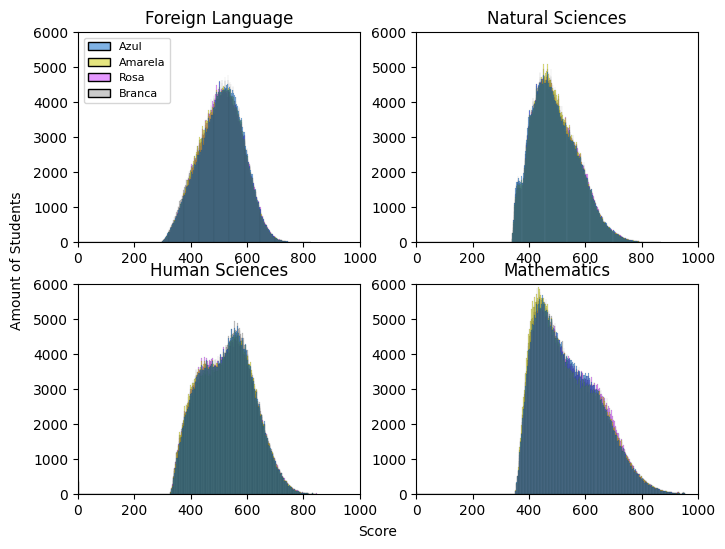

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8, 6))

axes[0, 0].title.set_text("Foreign Language")
axes[1, 0].title.set_text("Human Sciences")
axes[0, 1].title.set_text("Natural Sciences")
axes[1, 1].title.set_text("Mathematics")

sns.histplot(prova_lc, ax=axes[0, 0], palette=["#0066cc", "#cccc00", "#cc33ff", "#999999"], legend=True)
sns.histplot(prova_ch, ax=axes[1, 0], palette=["#0066cc", "#cccc00", "#999999", "#cc33ff"], legend=False)
sns.histplot(prova_cn, ax=axes[0, 1], palette=["#0066cc", "#cccc00", "#999999", "#cc33ff"], legend=False)
sns.histplot(prova_mt, ax=axes[1, 1], palette=["#0066cc", "#cccc00", "#cc33ff", "#999999"], legend=False)

axes[0, 0].set(xlabel=None, ylabel=None, ylim=(0,6000), xlim=(0,1000))#, yticks=[])
axes[1, 0].set(xlabel=None, ylabel=None, ylim=(0,6000), xlim=(0,1000))#, yticks=[])
axes[0, 1].set(xlabel=None, ylabel=None, ylim=(0,6000), xlim=(0,1000))#, yticks=[])
axes[1, 1].set(xlabel=None, ylabel=None, ylim=(0,6000), xlim=(0,1000))#, yticks=[])

# Legend
sns.move_legend(axes[0, 0], "upper left", fontsize='8')
fig.text(0.5, 0.04, 'Score', ha='center')
fig.text(0.04, 0.5, 'Amount of Students', va='center', rotation='vertical')


In [7]:
# Calculate mean
mean_ch = prova_ch.mean()
mean_cn = prova_cn.mean()
mean_lc = prova_lc.mean()
mean_mt = prova_mt.mean()

print(mean_ch, mean_cn, mean_lc, mean_mt)

# Calculate std
mean_ch = prova_ch.std()
mean_cn = prova_cn.std()
mean_lc = prova_lc.std()
mean_mt = prova_mt.std()

print(mean_ch, mean_cn, mean_lc, mean_mt)

Azul       526.648255
Amarela    524.823964
Branca     527.250349
Rosa       524.480499
dtype: float64 Azul       492.551845
Amarela    494.044864
Cinza      493.516694
Rosa       494.947834
dtype: float64 Azul       509.087841
Amarela    506.308343
Rosa       507.433576
Branca     505.638654
dtype: float64 Azul       538.470490
Amarela    536.079355
Rosa       542.957626
Cinza      538.011692
dtype: float64
Azul       92.947033
Amarela    94.194322
Branca     93.827867
Rosa       94.153610
dtype: float64 Azul       81.526412
Amarela    80.133975
Cinza      80.935861
Rosa       80.781308
dtype: float64 Azul       77.152112
Amarela    77.076272
Rosa       76.990209
Branca     78.419205
dtype: float64 Azul       109.258377
Amarela    111.762631
Rosa       110.920447
Cinza      110.907773
dtype: float64


In [8]:
print("MT")
for column in prova_mt:
    print(column, len(prova_mt[column].dropna()))

print("CN")
for column in prova_cn:
    print(column, len(prova_cn[column].dropna()))

print("CH")
for column in prova_ch:
    print(column, len(prova_ch[column].dropna()))

print("LC")
for column in prova_lc:
    print(column, len(prova_lc[column].dropna()))

MT
Azul 517658
Amarela 523253
Rosa 518543
Cinza 518395
CN
Azul 517658
Amarela 523253
Cinza 518395
Rosa 518543
CH
Azul 517132
Amarela 524356
Branca 517563
Rosa 518465
LC
Azul 517132
Amarela 524356
Rosa 518465
Branca 517563


In [9]:
prova_ch_azul_p = prova_ch.groupby("Azul").size().reset_index(name='P')
prova_ch_amarela_p = prova_ch.groupby("Amarela").size().reset_index(name='P')
prova_ch_branca_p = prova_ch.groupby("Branca").size().reset_index(name='P')
prova_ch_rosa_p = prova_ch.groupby("Rosa").size().reset_index(name='P')

prova_cn_azul_p = prova_cn.groupby("Azul").size().reset_index(name='P')
prova_cn_amarela_p = prova_cn.groupby("Amarela").size().reset_index(name='P')
prova_cn_cinza_p = prova_cn.groupby("Cinza").size().reset_index(name='P')
prova_cn_rosa_p = prova_cn.groupby("Rosa").size().reset_index(name='P')

prova_lc_azul_p = prova_lc.groupby("Azul").size().reset_index(name='P')
prova_lc_amarela_p = prova_lc.groupby("Amarela").size().reset_index(name='P')
prova_lc_branca_p = prova_lc.groupby("Branca").size().reset_index(name='P')
prova_lc_rosa_p = prova_lc.groupby("Rosa").size().reset_index(name='P')

prova_mt_azul_p = prova_mt.groupby("Azul").size().reset_index(name='P')
prova_mt_amarela_p = prova_mt.groupby("Amarela").size().reset_index(name='P')
prova_mt_cinza_p = prova_mt.groupby("Cinza").size().reset_index(name='P')
prova_mt_rosa_p = prova_mt.groupby("Rosa").size().reset_index(name='P')

In [10]:
prova_ch_p = pd.merge(prova_ch_azul_p, prova_ch_amarela_p, how="inner", left_on="Azul", right_on="Amarela", suffixes=["Azul", "Amarela"])
prova_ch_p = pd.merge(prova_ch_p, prova_ch_branca_p, how="inner", left_on="Azul", right_on="Branca", suffixes=["", "Branca"])
prova_ch_p = pd.merge(prova_ch_p, prova_ch_rosa_p, how="inner", left_on="Azul", right_on="Rosa", suffixes=["Branca", "Rosa"])

prova_cn_p = pd.merge(prova_cn_azul_p, prova_cn_amarela_p, how="inner", left_on="Azul", right_on="Amarela", suffixes=["Azul", "Amarela"])
prova_cn_p = pd.merge(prova_cn_p, prova_cn_cinza_p, how="inner", left_on="Azul", right_on="Cinza", suffixes=["", "Cinza"])
prova_cn_p = pd.merge(prova_cn_p, prova_cn_rosa_p, how="inner", left_on="Azul", right_on="Rosa", suffixes=["Cinza", "Rosa"])

prova_lc_p = pd.merge(prova_lc_azul_p, prova_lc_amarela_p, how="inner", left_on="Azul", right_on="Amarela", suffixes=["Azul", "Amarela"])
prova_lc_p = pd.merge(prova_lc_p, prova_lc_branca_p, how="inner", left_on="Azul", right_on="Branca", suffixes=["", "Branca"])
prova_lc_p = pd.merge(prova_lc_p, prova_lc_rosa_p, how="inner", left_on="Azul", right_on="Rosa", suffixes=["Branca", "Rosa"])

prova_mt_p = pd.merge(prova_mt_azul_p, prova_mt_amarela_p, how="inner", left_on="Azul", right_on="Amarela", suffixes=["Azul", "Amarela"])
prova_mt_p = pd.merge(prova_mt_p, prova_mt_cinza_p, how="inner", left_on="Azul", right_on="Cinza", suffixes=["", "Cinza"])
prova_mt_p = pd.merge(prova_mt_p, prova_mt_rosa_p, how="inner", left_on="Azul", right_on="Rosa", suffixes=["Cinza", "Rosa"])

# Remove redundant columns
prova_ch_p = prova_ch_p.drop(["Amarela", "Branca", "Rosa"], axis=1)
prova_ch_p = prova_ch_p.rename(columns={"Azul": "Score"})
prova_cn_p = prova_cn_p.drop(["Amarela", "Cinza", "Rosa"], axis=1)
prova_cn_p = prova_cn_p.rename(columns={"Azul": "Score"})
prova_lc_p = prova_lc_p.drop(["Amarela", "Branca", "Rosa"], axis=1)
prova_lc_p = prova_lc_p.rename(columns={"Azul": "Score"})
prova_mt_p = prova_mt_p.drop(["Amarela", "Cinza", "Rosa"], axis=1)
prova_mt_p = prova_mt_p.rename(columns={"Azul": "Score"})

In [11]:
for column in prova_ch_p:
    if column.startswith("P"):
        prova_ch_p[column] = prova_ch_p[column] / prova_ch_p[column].sum()

for column in prova_cn_p:
    if column.startswith("P"):
        prova_cn_p[column] = prova_cn_p[column] / prova_cn_p[column].sum()

for column in prova_lc_p:
    if column.startswith("P"):
        prova_lc_p[column] = prova_lc_p[column] / prova_lc_p[column].sum()

for column in prova_mt_p:
    if column.startswith("P"):
        prova_mt_p[column] = prova_mt_p[column] / prova_mt_p[column].sum()

In [12]:
import numpy as np

# KL divergence

def KLDivergence(x:pd.DataFrame, y:pd.DataFrame):
    px = np.array(x)
    py = np.array(y)
    return np.sum(np.where(px != 0, px * np.log2(px / py), 0))

name = ["prova_lc_p", "prova_ch_p", "prova_cn_p", "prova_mt_p"]
i=0
for prova in [prova_lc_p, prova_ch_p, prova_cn_p, prova_mt_p]:
    print(name[i])
    for col1 in prova:
        if col1 in ["PAzul", "PAmarela", "PBranca", "PRosa", "PCinza"]:
            print("pivot", col1)
            for col2 in prova:
                if col2 in ["PAzul", "PAmarela", "PCinza", "PBranca", "PRosa"]:
                    print("pivot", col1)
                    print("compare", col2)
                    print(KLDivergence(prova[col1], prova[col2]))
    i+=1
# print(KLDivergence(prova_ch_p["PAzul"], prova_ch_p["PAmarela"]))
# print(KLDivergence(prova_ch_p["PAmarela"], prova_ch_p["PAzul"]))

prova_lc_p
pivot PAzul
pivot PAzul
compare PAzul
0.0
pivot PAzul
compare PAmarela
0.013212540768677138
pivot PAzul
compare PBranca
0.014069541642287606
pivot PAzul
compare PRosa
0.013735831971510827
pivot PAmarela
pivot PAmarela
compare PAzul
0.013159650223179418
pivot PAmarela
compare PAmarela
0.0
pivot PAmarela
compare PBranca
0.012075039599555505
pivot PAmarela
compare PRosa
0.012322928404257149
pivot PBranca
pivot PBranca
compare PAzul
0.01426778702409075
pivot PBranca
compare PAmarela
0.012317506227007616
pivot PBranca
compare PBranca
0.0
pivot PBranca
compare PRosa
0.01361644885623089
pivot PRosa
pivot PRosa
compare PAzul
0.013640846326029923
pivot PRosa
compare PAmarela
0.012291808833417588
pivot PRosa
compare PBranca
0.013329634384094272
pivot PRosa
compare PRosa
0.0
prova_ch_p
pivot PAzul
pivot PAzul
compare PAzul
0.0
pivot PAzul
compare PAmarela
0.012925470194004767
pivot PAzul
compare PBranca
0.0138064784205974
pivot PAzul
compare PRosa
0.013400730287838314
pivot PAmarela
pi